This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

# Data Wrangling

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
sb.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [73]:
#loading data to dataframe
bk = pd.read_csv('201902-fordgobike-tripdata.csv')

In [85]:
# defining function to quickly give data information
def pc(col_num):
    """ Function to quickly give dtype, null count and sample data"""
    a = int(col_num)
    print(bk.iloc[:, a].sample(5))
    print('#######################################################')
    print(bk.iloc[:, a].dtype)
    print('#######################################################')
    print(f'Count of nans = {bk.iloc[:,a].isnull().sum()}')
    print('#######################################################')
    print(bk.iloc[:, a].describe())

In [86]:
pc(0)

129445     138
23836     1061
46828      783
149879     367
96884     1537
Name: duration_sec, dtype: int64
#######################################################
int64
#######################################################
Count of nans = 0
#######################################################
count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64


In [5]:
bk


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [6]:
# getting shape of dataframe
bk.shape

(183412, 16)

In [7]:
# checking columns
bk.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
bk.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
# getting null values in the dataframe
bk.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
#checking percentage of null values
for col in bk.columns:
    pom =np.mean(bk[col].isnull())
    print('{} - {}%'.format(col, round(pom*100)))

duration_sec - 0%
start_time - 0%
end_time - 0%
start_station_id - 0%
start_station_name - 0%
start_station_latitude - 0%
start_station_longitude - 0%
end_station_id - 0%
end_station_name - 0%
end_station_latitude - 0%
end_station_longitude - 0%
bike_id - 0%
user_type - 0%
member_birth_year - 5%
member_gender - 5%
bike_share_for_all_trip - 0%


## Data Cleaning

DEFINE: Drop all missing values rows

Code:

In [11]:
bk.dropna(inplace=True)

Test

In [12]:
bk.isnull().any().sum()

0

DEFINE: Change start time and end time datatype to datetime instead of object and bike id to string

Code:

In [13]:
bk['start_time'] = pd.to_datetime(bk['start_time'])
bk['end_time'] = pd.to_datetime(bk['end_time'])
bk['bike_id'] =bk.bike_id.astype(str)



Test:

In [14]:
bk.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [15]:
#splitting getting day, month and year from start and end dates

bk['start_day'] = bk['start_time'].dt.day_name()
bk['start_month'] = bk['start_time'].dt.month_name()
bk['start_hr'] = bk['start_time'].dt.hour
bk['start_hr'] = bk.start_hr.astype(str)

bk['end_day'] = bk['end_time'].dt.day_name()
bk['end_month'] = bk['end_time'].dt.month_name()
bk['end_hr'] = bk['end_time'].dt.hour
bk['end_hr'] = bk.end_hr.astype(str)

In [16]:
bk.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_month', 'start_hr', 'end_day', 'end_month',
       'end_hr'],
      dtype='object')

In [18]:
# show number of duplicated values
bk.duplicated().sum()

0

# Data Exploration

### What is the structure of your dataset?

There were initially 183,412 rides in the dataset with 16 features which was later dropped to 174952 rides and 21 features after fueature engineering. There are 2 datetime, 7 float, 1 int and 12 categorical(string) variables with no particular order. I also didn't find any duplicated values but there are some missing values in some columns, like the start and end stations id and name, and also the gender and birth year for the members.

### What is/are the main feature(s) of interest in your dataset?

I am interested in figuring out how trip duration is dependent on other specifications from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Due to my ability to extract the day, week, and month columns, I am certain that the start date variable will provide me the data I need for these conclusions. I anticipate that the majority of travels will occur early in the day, throughout the week, and over holidays.


## Univariate Exploration


### What is the average trip duration?

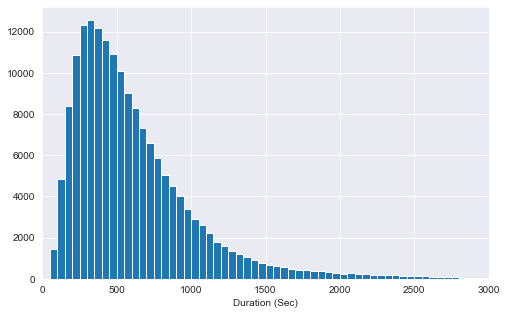

In [19]:
#standard-scaled plot
binsize = 50
bins = np.arange(50, bk['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bk, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([0, 3000]);

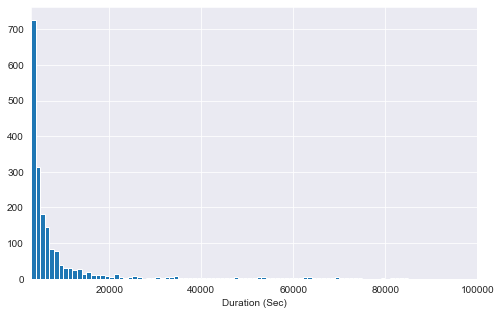

In [20]:
# tail part of the distribution
binsize = 1000
bins = np.arange(3000, bk['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bk, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([3000, 100000]);

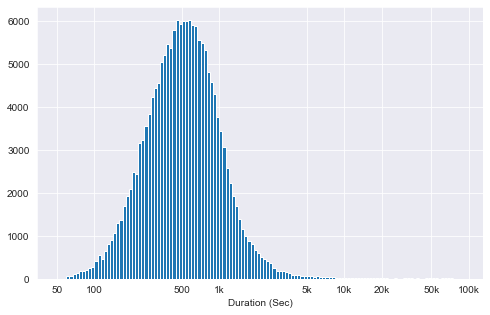

In [21]:
#due  to the long tail in the distribution, I will put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bk['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bk, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

Duration has a long-tailed distribution, with a lot of trips on the short duration end (200 - 1000 secs) and few on the long duration end. It has a peak at around 500 secs and a smooth fall till around 10k secs. There are fewer longer durations afterwards with spaces in between.

## How many trips in a week?

In [22]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'start_hr': [str(i) for i in range(0,24)],
                    'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bk[var] = bk[var].astype(ordered_var)

<AxesSubplot:xlabel='end_day', ylabel='count'>

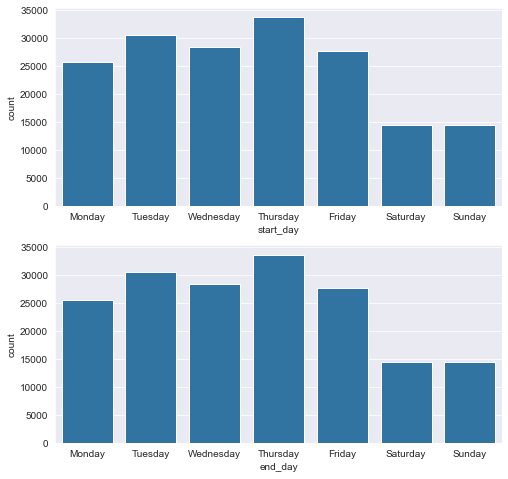

In [23]:
# ride frequency per days

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bk, x = 'start_day', color = default_color,  ax = ax[0])
sb.countplot(data = bk, x = 'end_day', color = default_color,  ax = ax[1])


Most of the trips were taken (start and end days) on Thurdays, followed by Tuedays, then, Friday, Wednesday and Monday. Also, weekends have the lowest trip records

<AxesSubplot:xlabel='end_hr', ylabel='count'>

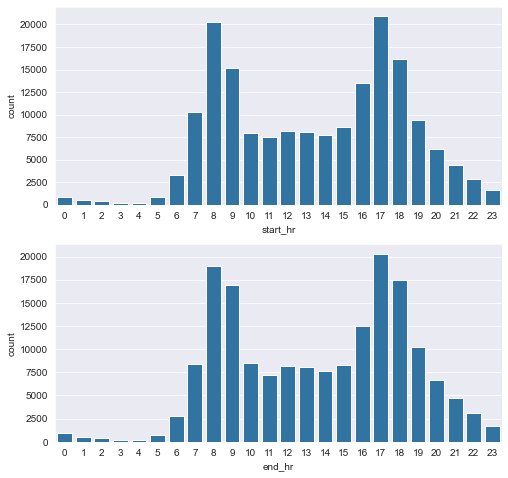

In [24]:
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bk, x = 'start_hr', color = default_color,  ax = ax[0])
sb.countplot(data = bk, x = 'end_hr', color = default_color, ax = ax[1])

As observed for the days, the 8th, 9th, 17th and 18th hours have the highest trip records. This is expected as it can be linked to morning rush and closing hour from work.
The 3rd and 4th hours have the least trip records.

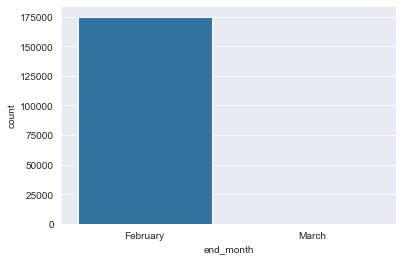

In [25]:
# trip end frequency per day

sb.countplot(x=bk['end_month'],
             order=bk['end_month'].value_counts(ascending=False).index);

abs_values = bk['end_month'].value_counts(ascending=False)
rel_values = bk['end_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.3f}%)' for p in zip(abs_values, rel_values)]

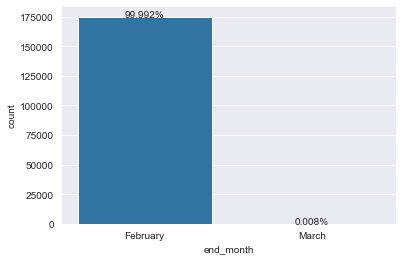

In [26]:
# trip end frequency per day

ax = sb.countplot(data = bk, x = 'end_month',  color=sb.color_palette()[0], order=bk.end_month.value_counts().index)

total = len(bk)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

All the trips started and ended in February except for a very few (14) which ended in March

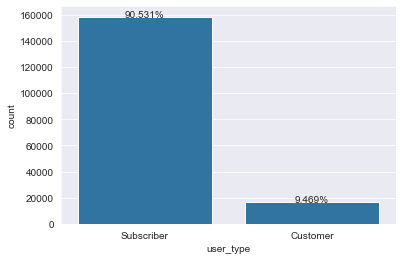

In [27]:
# ride frequency per user type
ax = sb.countplot(data = bk, x = 'user_type',  color=sb.color_palette()[0], order=bk.user_type.value_counts().index)

total = len(bk)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

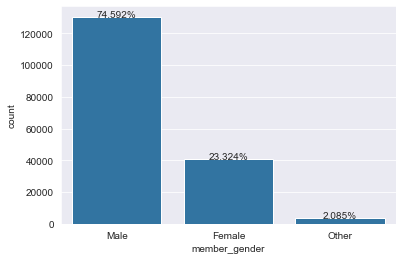

In [28]:
# ride frequency per gender
ax = sb.countplot(data = bk, x = 'member_gender',  color=sb.color_palette()[0], order=bk.member_gender.value_counts().index)

total = len(bk)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

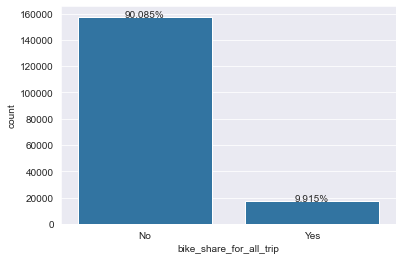

In [29]:
# ride frequency per bike_share_for_all_trip
ax = sb.countplot(data = bk, x = 'bike_share_for_all_trip',  color=sb.color_palette()[0],
                  order=bk.bike_share_for_all_trip.value_counts().index)

total = len(bk)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();



There are more of subscribers (about 90%) than normal customers and more non bike sharing for all trip (about 90%) that bike sharing for all trip.

Most of the riders are male (>70%)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

In [30]:
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day','end_day', 'start_hr', 'end_hr']

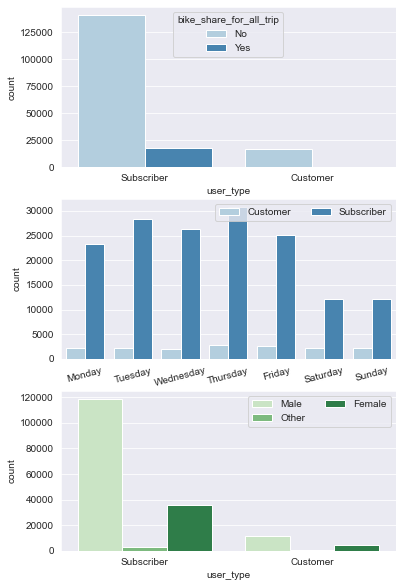

In [58]:

# plotting 3 graphs
plt.figure(figsize = [6, 10])

# subplot 1: user_type vs bike_share_for_all_trip
plt.subplot(3, 1, 1)
sb.countplot(data = bk, x = 'user_type', hue = 'bike_share_for_all_trip', order=bk.user_type.value_counts().index,
             palette = 'Blues')

# subplot 2: end_day vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bk, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=15)

# subplot 3: user_type vs. member_gender,
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bk, x = 'user_type', hue = 'member_gender',order=bk.user_type.value_counts().index,
             palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()


The use of this service for Subscribers is high on weekdays and decreases on weekends. In contrast to Subscribers, Customers have increased on weekends, starting from Friday and decreasing on Sundays. It is possible that the newcomers will return to their respective places that day, because Monday they have started their activities again.

## Multivariate Exploration


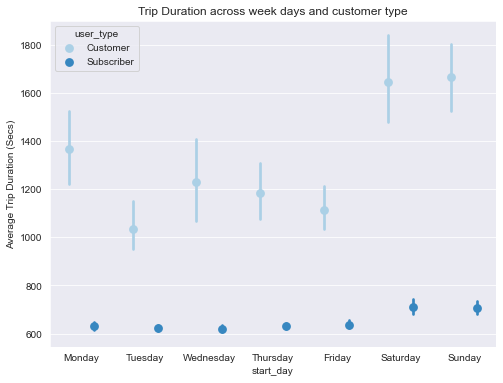

In [64]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bk, x ='start_day', y = 'duration_sec', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)
plt.show();

Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

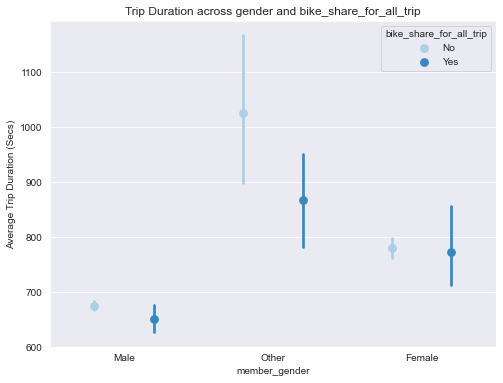

In [65]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bk, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')

ax.set_yticklabels([],minor = True)
plt.show();



The other gender group travels for the longest duration for bike sharing and non bike sharing, followed by female, then, male


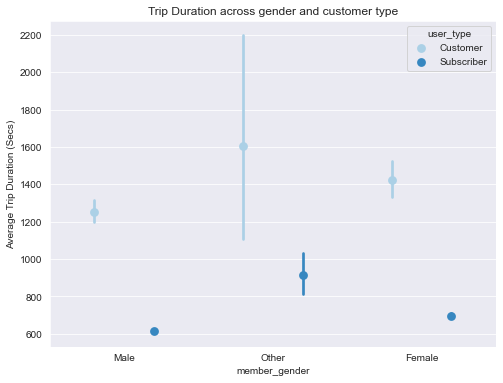

In [67]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bk, x ='member_gender', y = 'duration_sec', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)
plt.show();



For both subscribers and customers, the other gender group spent most duration followed by female and then male

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes! Subscribers tends to have stable duration usage than Customers. Subscribers tends to use the service in weekdays, in contrast Customers have more flexible time and Subscribers is have very intense usage at peak hour, Customers have more flexible time.

### Were there any interesting or surprising interactions between features?

> That most trips were spent by other gender.

## Conclusions
>The dataset is just for the months of February and March 2019.
>The average duration for all trips is about 500 seconds
>Only subscribers are allowed to share bikes on trips
>Females spend more duration than males
>Customers travel for longer durations regardless of the day of the week as compared to subscribers.
>The rush hours; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part 1 exploration.ipynb'])

1